# 【申万】罗伯·瑞克超额现金流选股法则复现和延伸探讨


-- 本研报分析基于[【复现】系列十三:罗伯·瑞克超额现金流选股法则](https://www.joinquant.com/view/community/detail/30543ad72454c7648b03bae542af55c9?type=1)，感谢前人抛砖引玉，本文按照思路做了一些重新梳理

-- 更新部分，原分析采用了Tushare来获取部分财务数据，这里调整为全部采用聚宽数据。其中，本文调整了对企业自由现金流的计算方式，作为该现金流选股法的核心，其定义有待商榷，也请指正。最后，原分析采用了调取回测模块来进行计算，本文基于前序[致敬比乔斯基价值选股，对FFScore研报读后再整理](https://www.joinquant.com/view/community/detail/af5f2d96e4ab142bdd1701b14503fec9)的研究整理，将部分方法固化为共享函数，并采取因子化来进行回测验证。

## 1. 理论整理

罗伯·瑞克，华尔街著名的资本大鳄，从事证券行业近 50 年。本篇介绍的罗伯·瑞克超额现金流选股法则是由其在接受股票书籍作者采访时，给投资者的投资建议所提炼而成。

### 1.1 罗伯·瑞克超额现金流选股模型逻辑

罗伯·瑞克投资策略从三个角度对投资标的进行考察

- 估值水平：股票具备合理的估值
- 分红水平：股票具备一定的分红收益
- 财务状况：公司的财务状况要求健康。 

以这三个角度出发，选择了 5 个指标，分别是<font color=Red>市净率、股息收益率、市盈率、借款总额占总资本比例、市现率</font>，共同构建了选股准则，形成了罗伯·瑞克超额现金流选股法则。其中，罗伯·瑞克尤其重视股价和超额现金流的关系，倾向于现金流相对市值更加充足的公司。

整理如下：

- 估值水平：用市净率、市盈率、股价/超额现金流来衡量股票的估值，要求买入的投资标的足够“便宜”，具有合理的估值。
- 分红水平：用股息收益率来衡量股票的分红水平，保证价值投资者能够获得一定的分红收益。
- 财务状况：用借款总额/总资本来衡量公司的偿债能力和财务结构，保证买入的投资标的具备足够强大的资产负债表。 

### 1.2 模型解构

基于罗伯·瑞克的思路和选择的指标，申万整理出的筛选逻辑，如下：

- 市净率低于 1.5 
- 市盈率低于市场平均值
- 股价/超额现金流量比低于 7.5
- 股利收益率高于市场平均值 
- 借款总额占总资本比例低于 33%

结合中国投资市场的实际情况之后，申万提出，在研究和回测中对部分原始标准进行调整： 

- 改为：市净率低于 3
- 改为：股价现金流量比低于全市场平均值的80%

本文将首先以申万版本进行回测

### 1.3 指标定义和解读

这里仅讨论不能直接从因子库里获取的指标，以及对瑞克指标的思考分析：

- 超额现金流等价采用 <font color=Red>自由现金流（FCF）</font>

    做为模型的核心，自由现金流就是企业日常经营活动中产生的，减去各种税费，扣除企业相关投资需求后，能够分配给股东和债权人的最大现金流量。即经营活动产生的现金流量净额 - 股利 - 购买长期资产支出 + 出售长期资产得到的现金。
    
    如果一个企业的自由现金流越大，表明其内部产生现金的能力就越大，其可自由运用的内源资金也越多，企业对外融资的要求也越低，企业的财务状况越健康。此外，由于有真实的现金支出（收付实现制），自由现金流量不容易受会计方法的影响，也不受经理人的操纵，盈余管理（即受经理人操作空间更小的财务指标，但不能完全杜绝）的影响可以尽可能削弱。
    
    由于A股的核准制上市模式，相比较瑞克所在的美股，中国企业本身都受到一定的经营时间和业绩约束，具备良好的经营和业绩基础，因此上市后如果继续健康发展，理论上讲，使用自由现金流量的指标来评判是可行的，即该方法理论上是适应A股市场的。
    
    瑞克采用了股价相除，而股票价值本质上等于未来股利流入的现值，即未来现金流的折现。假设公司的自由现金流量增长量为零，不举债且将全部自由现金流量折现为股利分配给股东，即可以得出理论的股票价格等于平均自由现金流量与必要报酬率（以无风险收益为准）的比值。该比值可以理论上去衡量投资者的投资回报，即当自由现金流大于必要报酬率的倒数时，表明股票的市场价值被高估，反之，表明股票的市场价值被低估。所以，按照瑞克的分析方法，逻辑上是可以选出市场上被错误估价的股票，也就是达到要求买入的投资标的足够“便宜”，具有合理的估值。
    
    所以综上，瑞克认为决定股票内在价值是以股息收入为基础，以现金流贴现来操作，将股票的内在价值等同于其日后获得的全部股息的现值。那么超额现金流的逻辑其实就是在寻找投资对象的内在价值，即当市价低于这一内在稳固基础时，就出现买进的机会，相反，当市价高了内在价值时，就出现卖出的机会。在2022年大盘如此低迷的时期，讨论内在价值，有助于寻找更稳健长期的价值投资标的。

    聚宽中自由现金流因子是不能直接获取的，按照定义，整理得到：自由现金流 = 经营活动产生的现金流量净额 - 分配股利、利润或偿付利息支付的现金 - 购建固定资产、无形资产和其他长期资产支付的现金 + 处置固定资产、无形资产和其他长期资产收回的现金净额。
    
    $FCF = net\_operate\_cash\_flow - dividend\_interest\_payment - fix\_intan\_other\_asset\_acqui\_cash + fix\_intan\_other\_asset\_dispo\_cash$


- 股息率（Dividend Yield Ratio）
    
    在市场存在不确定的情况下，分红即红利策略是难得的避险方式之一，较高股息率的板块也在22年表现亮眼，称为了避险资金的避风港。那么股息率就是一年的税前总派息额与市值的比，是投资收益率的另外一种折现形式。
    
    $股息率 = \frac{每股分红金额 * 分红次数}{股价} = \frac{总分红}{市值}$（注：由于股价存在OHLC和复权，所以以市值计算会更公允简单）
    
    不同公司每年分红次数不同，分红预案也不固定，一般随年报，所以分红的影响应该从披露那天开始，否则会被计入未来函数。
    
    上市公司的分红派息细节其实有多种场景，这导致了股息的定义和取值范围十分宽泛，例如对普通股和优先股的分红划分比例，还有送股和转增，以及AH股间的不同分红比例和汇率差，这里假设以实际现金分红来计算股息，由于转股没有在现金流上有实际支出，所以股息不应该包含转增派息等。
    
    区间统计分两种，静态计算方式以当年12个月实际分红总额，比上时点的总市值；动态TTM计算方式是以最近4个季度的分红总额，比上时点的总市值。两者相比较，动态TTM更适合季度调仓，并且较真实的反应分红或转增对股价的影响。
    
    聚宽中没有现成的股息率，需要自己计算，这也是本文重点关注的计算尝试之二。分红的单位是万元，市值的单位是亿元，其中，由于聚宽的 market_cap 字段包含了 ABH 三个市场，为了合理匹配，这里采用了流通市值来替代，其数据仅包含A股市场。


- 借款占比（$debt\_ratio$）
    
    采用$\frac{长借+短借}{资产总计}$来计算，其中长期借款为$longterm\_loan$，短期借款为$shortterm\_loan$

### 1.4 模型因子化

- **估值水平**
    - 市净率：$pb<3$为1，否则为0
    - 市盈率：$pe\_ttm<pe\_ttm_{avg}$为1，否则为0
    - 内在价值 = 股价/自由现金流：$intr\_value = \frac{close}{FCF}<\frac{close}{FCF}_{avg}*0.8$为1，否则为0


- **分红水平**
    - 股息率：$dv\_ttm>dv\_ttm_{avg}$为1，否则为0


- **财务状况**
    - 借款占比：$debt\_ratio=\frac{longterm\_loan + shortterm\_loan}{total\_assets}<0.33$为1，否则为0

根据上续讨论，对模型构建5因子模型，按总分排序，可以得到模型结果

$LScore = pb + pe + intr\_value + dv\_ttm + debt\_ratio$

## 申万对模型的评价

目前所测试的选股法则并不能算成熟的策略，仍有不足。其一、在 2008 年出现过长达 202 天，幅度为 71%的回撤；其二、策略相对基准的相对强弱波动较大，仅在 2008 年到 2010 年、2013 年后体现出明显的相对优势，而在其他 5 年间没有体现出稳定的相对优势；其三、策略持股个数波动略大，易造成交易执行的问题。当股票个数过少时，隐藏的风险和波动性加大。

申万提出三个简单的优化建议: 

- 吸收罗伯·瑞克超额现金流选股法则中的投资思维，在原有基础上扩展筛选股的考查纬度、或者调整具体的考核指标，进一步优化考察指标的参数
- 对选股数量和行业分布进行调整，利用分散化投资和行业中性的优势来避免策略的大幅波动，减少策略中明显不足的最大回撤指标；
- 将罗伯·瑞克超额现金流选股法则所选出的股票作为股票池，利用其它方法进一步筛选和判断入市时机。

# 基础代码准备

In [5]:
import warnings
warnings.simplefilter('ignore')

import sys
sys.path.append("/home/jquser")

import numpy as np
import pandas as pd
import alphalens as al

from IPython.core.display import display, HTML
from typing import (List, Tuple, Dict, Callable, Union)

from jqdata import *
from jqfactor import Factor
from tqdm import tqdm_notebook
from hs_rd_lib import get_trade_period, get_factor, pkl_batch, get_pool_period_price, plot_cum_return, strategy_performance

display(HTML("<style>.container { width:100% !important; }</style>"))  # Juypter 的显示调整

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文显示修正
# plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('display.width', 300)  # Pandas 输出配置
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

In [23]:
class CashflowFactor(Factor):
    name = 'CashflowFactor'
    max_window = 1
    watch_date = None
    #
    dependencies = [
        # 估值水平
        'pb_ratio', 'pe_ratio', 
        'net_operate_cash_flow', 'dividend_interest_payment', 
        'fix_intan_other_asset_acqui_cash', 'fix_intan_other_asset_dispo_cash',
        'close',
        
        # 分红水平
        
        # 财务状况
        'longterm_loan', 'shortterm_loan', 'total_assets',
    ]
    #
    def calc(self, data: Dict) -> None:
        # 估值水平
        pb_ratio: pd.DataFrame = data['pb_ratio']
        pe_ratio: pd.DataFrame = data['pe_ratio']
            
        intr_value: pd.DataFrame = data['close'] / (data['net_operate_cash_flow'] - data['dividend_interest_payment'] - data['fix_intan_other_asset_acqui_cash'] + data['fix_intan_other_asset_dispo_cash'])
            
        # 分红水平
            
        # 财务状况
        debt_ratio: pd.DataFrame = (data['longterm_loan'] + data['shortterm_loan']) / data['total_assets']    
        
        # 储存原始数据
        indicator_tuple: Tuple = (pb_ratio, pe_ratio, intr_value, debt_ratio)  # longterm_loan, shortterm_loan, total_assets)
        self.basic: pd.DataFrame = pd.concat(indicator_tuple).T.replace([-np.inf, np.inf], np.nan)
        self.basic.columns = ['PB', 'PE', 'INTR_VALUE', 'DEBT']  #, 'close', 'longterm_loan', 'shortterm_loan', 'total_assets']
#         self.fscore: pd.Series = self.basic.apply(sign).sum(axis=1)

def get_dv_ttm(stk_pool, startDt):
    if stk_pool == 'A':
        code_list: List = get_all_securities(types='stock', date=startDt).index.tolist()
    else:
        code_list: List = get_index_stocks(stk_pool)

    # 获取分红
    f = finance.STK_XR_XD
    q = query(f.code, f.report_date, f.bonus_amount_rmb).filter(
        f.code.in_(code_list), f.report_date>=startDt).order_by(
        f.report_date.asc())    
    df = finance.run_query(q)
    
    df = df.fillna(0)
    df['report_date'] = pd.to_datetime(df['report_date'])
    df.set_index('report_date', drop=True, inplace=True)
    df = df.groupby('code').rolling(2).sum()  # 求TTM分红
    df.dropna(inplace=True)
    
    # 获取市值
    if not df.empty:
        day_list = list(set(df.index.get_level_values(1).astype('str').tolist()))
        q = query(valuation.day, valuation.code, valuation.circulating_market_cap).filter(
            valuation.code.in_(code_list))
        cap = [get_fundamentals(q, date=i) for i in day_list]
        cap_df: pd.DataFrame = pd.concat(cap)
        cap_df.columns = ['report_date', 'code', 'macap']
        cap_df['report_date'] = pd.to_datetime(cap_df['report_date'])

        # 计算股息率
        df = df.reset_index().merge(cap_df, on=['report_date', 'code'], how='left')
        df['dv_ttm'] = df.apply(lambda x: x['bonus_amount_rmb'] / 10000 / x['macap'], axis=1)
        df = df[['code', 'report_date', 'dv_ttm']]
        df.columns = ['asset', 'date', 'DV']
    #     df = df.groupby(['asset']).resample('M').mean()

        df = df.sort_values(by=['date'])
        return df

## 设置全局参数

In [17]:
# ===================test=================
# startDt, endDt = '2018-12-31', '2022-01-01'  # for test
# periods: List = get_trade_period(startDt, endDt, 'ME')
# stk_pool = '000300.XSHG'  # 'A'
# stock_list = get_index_stocks(stk_pool) # test
# ========================================


# 时间区间
startDt, endDt = '2018-12-31', '2022-01-01'

# 股票池
stk_pool = 'A'

# 过滤行业代码
filter_ind_list = ['801780', '801790']

# 基准代码
benchmark_code = '000300.XSHG'

## 股价获取

为了确保后续数据对齐，所以日期以价格数据为准

如果对全市场做取值计算，默认内存会崩，这里分开存储，并最后合并

In [13]:
# 获取收盘价，数据量较大，分切成500天一存
price_periods: List = get_trade_period(startDt, endDt, 'D')
for i in range(0, len(price_periods), 500):
    price_df = get_pool_period_price(stk_pool, price_periods[i: i+500], filter_ind_list, 'open') 
    pkl_batch(price_df, 'price_df_'+str(i), method='write')

In [ ]:
df_1 = pkl_batch(pd.DataFrame(), 'price_df_0', method='read')
df_2 = pkl_batch(pd.DataFrame(), 'price_df_500', method='read')
price_df = np.append(df_1, df_2, axis=1)

如果是较小规模的数据，从这里计算并存取

In [4]:
# 获取收盘价，小数据量时使用
#
price_periods: List = get_trade_period(startDt, endDt, 'D')
price_df = get_pool_period_price(stk_pool, price_periods, filter_ind_list, 'open') 

pkl_batch(price_df, 'price_df', method='write')
price_df.head()

,time,code,open
0,2019-01-02,000001.XSHE,1103.21
1,2019-01-02,000002.XSHE,3159.76
2,2019-01-02,000004.XSHE,119.51
3,2019-01-02,000005.XSHE,27.50
4,2019-01-02,000006.XSHE,230.38


In [3]:
price_df = pkl_batch(pd.DataFrame(), 'price_df', method='read')

选股范围全市场，去除新股、ST、停牌个股，过滤银行和非银行业，最后将价格数据转换成以下格式，便于分析导入。

In [4]:
price_df.rename(columns={'time':'date'}, inplace=True)
pivot_price = pd.pivot_table(price_df, index='date', columns='code', values='open')
pkl_batch(pivot_price, 'pivot_price', method='write')
pivot_price.head(3)

code        000001.XSHE  000002.XSHE  000004.XSHE  000005.XSHE  000006.XSHE  000007.XSHE  000008.XSHE  000009.XSHE  000010.XSHE  000011.XSHE  000012.XSHE  000014.XSHE  000016.XSHE  000017.XSHE  000018.XSHE  000019.XSHE  000020.XSHE  000021.XSHE  000023.XSHE  000025.XSHE  000026.XSHE  000027.XSHE  \
date                                                                                                                                                                                                                                                                                                       
2019-01-02      1103.21      3159.76       119.51         27.5       230.38        97.04       103.95        36.19        43.20        33.59       114.04        84.24        74.67        14.29        15.59        38.35        25.28        90.39        33.82        50.11        60.65        94.27   
2019-01-03      1078.54      3154.46       119.58         27.4       229.05        97.28       103.41        35.61        43.73        33.99       114.33        86.33        74.67        14.61        15.66        38.03        24.77        89.30        33.77        49.96        60.82        92.48   
2019-01-04      1085.59      3170.37       121.37         27.3       226.38        92.22       101.54        34.94        43.34        33.81       114.61        84.42        72.83        14.42        15.23        37.49        24.46        86.49        33.58        50.11        60.73        91.41   

code        000028.XSHE  000029.XSHE  000030.XSHE  000031.XSHE  000032.XSHE  000034.XSHE  000035.XSHE  000036.XSHE  000037.XSHE  000038.XSHE  000039.XSHE  000040.XSHE  000042.XSHE  000043.XSHE  000045.XSHE  000046.XSHE  000048.XSHE  000049.XSHE  000050.XSHE  000055.XSHE  000056.XSHE  000058.XSHE  \
date                                                                                                                                                                                                                                                                                                       
2019-01-02       161.45          NaN        11.94        89.46        29.46        39.86        24.00        31.89        27.94        39.98       257.73        33.24       143.70        70.20        17.04       151.38          NaN       152.99        81.67        38.34        22.33        27.41   
2019-01-03       156.78          NaN        11.91        88.73        29.62        39.48        25.71        30.91        28.06        40.30       259.91        32.56       140.73        69.54        17.27       151.05          NaN       156.84        79.76        37.49        24.59        28.47   
2019-01-04       155.37          NaN        11.81        88.36        29.29        38.68        25.57        30.33        26.71        39.80       255.30        31.55       137.77        70.01        17.56       149.76          NaN       152.61        77.69        37.87        23.09        27.27   

code        000059.XSHE  000060.XSHE  000061.XSHE  000062.XSHE  000063.XSHE  000065.XSHE  000066.XSHE  000068.XSHE  000069.XSHE  000070.XSHE  000078.XSHE  000088.XSHE  000089.XSHE  000090.XSHE  000096.XSHE  000099.XSHE  000100.XSHE  000150.XSHE  000151.XSHE  000153.XSHE  000155.XSHE  000156.XSHE  \
date                                                                                                                                                                                                                                                                                                       
2019-01-02         9.36       144.61       105.85        82.05       333.24       116.86        54.10         9.17       263.18        20.25        60.91        36.57        55.82        23.98        24.42        21.34         7.42        41.73        27.96        28.73         5.66        12.79   
2019-01-03         9.20       143.15       101.70        82.39       333.07       115.49        53

In [8]:
pivot_price = pkl_batch(pd.DataFrame(), 'pivot_price', method='read')

## 基础数据获得

首先基于价格数据，获得每个月的最后一个交易日，然后基于该日期读取因子数据

In [5]:
price_date_list = pivot_price.index.astype(str).tolist()

previous_month = '01'
last_trade_day_list = []

for index, day in enumerate(price_date_list):
    month = day[5:7]
    
    if month != previous_month:
        previous_month = month
        last_trade_day_list.append(price_date_list[index - 1])
    
    if index == len(price_date_list) - 1:
        last_trade_day_list.append(day)
        
last_trade_day_list[:2]

['2019-01-31', '2019-02-28']

In [8]:
# 获取因子构造数据
data_list = list(get_factor(stk_pool, CashflowFactor, last_trade_day_list))
basic_df: pd.DataFrame = pd.concat({f.watch_date: f.basic for f in data_list}, names=['date', 'asset'])

pkl_batch(basic_df, 'basic_df', method='write')
basic_df.head()

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:159: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:159: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:159: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:159: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:159: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"


PB        PE    INTR_VALUE      DEBT
date       asset                                                
2019-01-31 000001.XSHE  0.8660    7.6796 -5.770953e-08       NaN
           000002.XSHE  2.1881    9.8993 -9.912689e-08  0.103090
           000004.XSHE  9.9129  110.4063           NaN       NaN
           000005.XSHE  2.2540   78.7219           NaN  0.205355
           000006.XSHE  1.1196    7.8389           NaN  0.155544

In [4]:
basic_df = pkl_batch(pd.DataFrame(), 'basic_df', method='read')

## 获取股息率数据

由于股息率数据的特殊性，不能直接从因子构造中读取，这里单独获取。

In [24]:
bouns_df = get_dv_ttm(stk_pool, startDt)
bouns_df.head()

,asset,date,DV
434,601857.XSHG,2018-12-31,0.014109
432,300180.XSHE,2018-12-31,0.005213
431,300056.XSHE,2019-02-01,0.000000
433,600828.XSHG,2019-03-15,0.048606
429,002333.XSHE,2019-03-31,0.025329


## 合成因子数据

In [27]:
# 将因子和股息率数据合并
basic_df.reset_index(inplace=True)
basic_df['date'] = pd.to_datetime(basic_df['date'])
if stk_pool == 'A':
    stock_list: List = get_all_securities(types='stock', date=startDt).index.tolist()

cff_df_raw = pd.DataFrame()
for i in tqdm_notebook(range(len(stock_list))):
    df = basic_df.query(f"asset=='{stock_list[i]}'").merge(bouns_df.query(f"asset=='{stock_list[i]}'"), how='outer').sort_values('date')
    df['DV'].fillna(method='ffill', inplace=True)
    df['DEBT'].fillna(method='ffill', inplace=True)
    df['DEBT'].fillna(0, inplace=True)
    df.dropna(inplace=True)
    if not df.empty:
        cff_df_raw = pd.concat([cff_df_raw, df])

cff_df_raw.head()

,level_0,index,date,asset,PB,PE,INTR_VALUE,DEBT,DV
6,20614.0,20614.0,2019-07-31,000001.XSHE,1.0794,9.4518,3.217534e-08,0.0,0.010523
7,24048.0,24048.0,2019-08-30,000001.XSHE,1.0438,9.0556,-5.400276e-08,0.0,0.010523
8,27487.0,27487.0,2019-09-30,000001.XSHE,1.2989,11.2681,-5.945617e-08,0.0,0.010523
9,30936.0,30936.0,2019-10-31,000001.XSHE,1.1769,11.2761,3.419381e-08,0.0,0.010523
10,34394.0,34394.0,2019-11-29,000001.XSHE,1.1067,10.6035,3.215403e-08,0.0,0.010523


In [28]:
# 计算行业平均数据，用于因子的打分判断
avg_df = cff_df_raw.groupby('date').mean().reset_index()
avg_df = avg_df[['date', 'PE', 'INTR_VALUE', 'DV']]
avg_df.columns = ['date', 'PE_avg', 'INTR_VALUE_avg', 'DV_avg']
avg_df.head()

,date,PE_avg,INTR_VALUE_avg,DV_avg
0,2019-01-31,31.428550,-1.190238e-07,0.009661
1,2019-02-28,41.013250,-1.441796e-07,0.009661
2,2019-03-29,30.982667,-8.203752e-08,0.022643
3,2019-04-30,15.812600,-2.559518e-08,0.062594
4,2019-05-31,15.100767,-1.023384e-08,0.062594


In [29]:
# 按股票独立打分
cff_df = pd.DataFrame()
for i in tqdm_notebook(range(len(stock_list))):
    df = cff_df_raw.query(f"asset=='{stock_list[i]}'").copy()
    if not df.empty:
#         print(df)
        df = df.merge(avg_df, on=['date'], how='left')
#         print(df)
        # 校对后的数据，进行打分计算
        if not df.empty:
            df['PB_s'] = df['PB'].apply(lambda x: 1 if x<3 else 0)
            df['PE_s'] = df.apply(lambda x: 1 if x['PE']<x['PE_avg'] else 0, axis=1)
            df['INTR_VALUE_s'] = df.apply(lambda x: 1 if x['INTR_VALUE']<x['INTR_VALUE_avg']*0.8 else 0, axis=1)
            df['DV_s'] = df.apply(lambda x: 1 if x['DV']>x['DV_avg'] else 0, axis=1)
            df['DEBT_s'] = df['DEBT'].apply(lambda x: 1 if x<0.33 else 0)
            df['CashflowFactor'] = df.apply(lambda x: x['PB_s'] + x['PE_s'] + x['INTR_VALUE_s'] + x['DV_s'] + x['DEBT_s'], axis=1)
#             print(df)
            cff_df = pd.concat([cff_df, df[['date', 'asset', 'CashflowFactor']]])
cff_df['date'] = pd.to_datetime(cff_df['date'], format='%Y-%m-%d')
pkl_batch(cff_df, 'cff_df', method='write')
cff_df.head()

,date,asset,CashflowFactor
0,2019-07-31,000001.XSHE,3
1,2019-08-30,000001.XSHE,4
2,2019-09-30,000001.XSHE,4
3,2019-10-31,000001.XSHE,3
4,2019-11-29,000001.XSHE,3


In [10]:
cff_df = pkl_batch(pd.DataFrame(), 'cff_df', method='read')

## 行业数据获得

In [24]:
"""
聚宽一级行业
行业代码	行业名称	起始日期
HY001	能源	2016-12-12
HY002	材料	2016-12-12
HY003	工业	2016-12-12
HY004	可选消费指	2016-12-12
HY005	日常消费	2016-12-12
HY006	医疗保健	2016-12-12
HY007	金融	2016-12-12
HY008	信息技术	2016-12-12
HY009	电信服务	2016-12-12
HY010	公用事业	2016-12-12
HY011	房地产	2016-12-12
"""
stock_list = cff_df['asset'].unique().tolist()
industry_data: Dict = get_industry(security=stock_list)
stock_ind = dict()
for i in range(len(stock_list)):
    stock_ind[stock_list[i]] = industry_data[stock_list[i]]['jq_l1']['industry_code']

# 罗伯瑞克原始版本分析

## 描述性分析

分布概要
                 count      mean       std  min  25%  50%  75%  max
CashflowFactor  8274.0  3.106357  0.972013  0.0  3.0  3.0  4.0  5.0


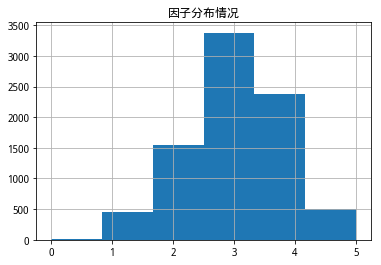

In [30]:
print(f"分布概要\n{cff_df.describe().T}")
plt.title('因子分布情况')
cff_df['CashflowFactor'].hist(bins=6)

有个直观的感觉，这套体系在熊市期间容易筛选出结果，牛市期间，该模型基本失效，或者说持股非常集中

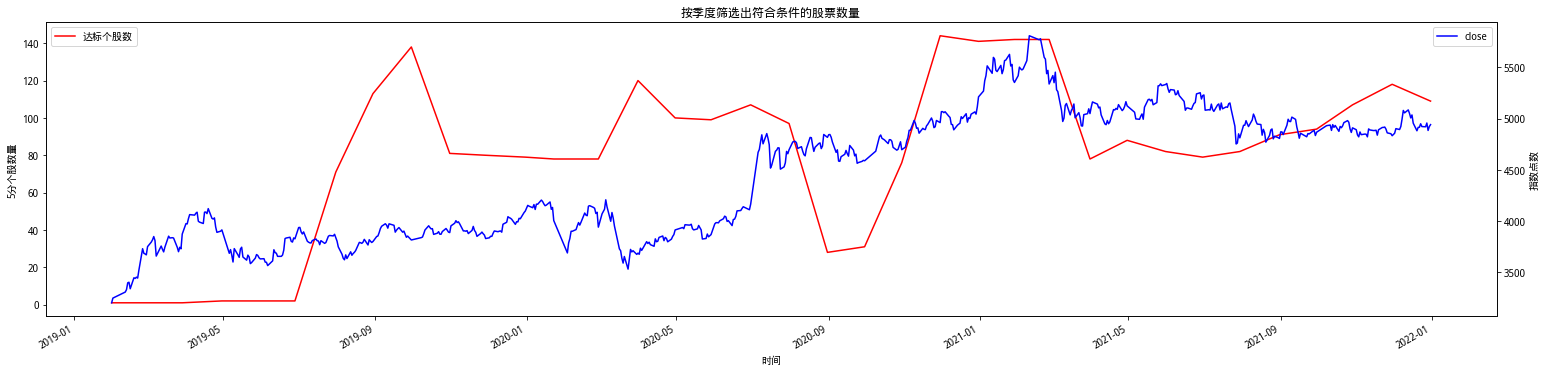

In [32]:
cff_df_5 = cff_df.query("CashflowFactor >= 4").groupby('date').size()
benchmark = get_price(benchmark_code, cff_df_5.index[0], cff_df_5.index[-1], fields='close')

fig = plt.figure(figsize=(26, 6))
ax1 = fig.add_subplot(111)
cff_df_5.plot(ax=ax1, label='达标个股数', color='r')
ax1.set_ylabel("5分个股数量")
plt.legend(loc=2)
plt.xlabel("时间")

ax2 = ax1.twinx()
benchmark.plot(ax=ax2, label='沪深300行情', color='b')
ax2.set_ylabel("指数点数")
plt.legend(loc=1)

plt.title("按季度筛选出符合条件的股票数量")
plt.show()

## 因子回测


In [12]:
pivot_cff = pd.pivot_table(cff_df, index='date', columns='asset', values='CashflowFactor')
pivot_cff = pivot_cff.stack()
pivot_cff.head()

date        asset      
2019-01-31  300180.XSHE    3.0
            601857.XSHG    4.0
2019-02-28  300180.XSHE    3.0
            601857.XSHG    4.0
2019-03-29  300180.XSHE    2.0
dtype: float64

In [25]:
cff_factor = al.utils.get_clean_factor_and_forward_returns(pivot_cff, 
                                                           pivot_price, 
                                                           groupby=stock_ind,
                                                           quantiles = None,#None, #5,
                                                           bins=[-1,0,4,6],
                                                           periods=(1, 22),
                                                           max_loss=0.3
                                                          )
pkl_batch(cff_factor, 'cff_factor', method='write')
cff_factor.head()

Dropped 3.9% entries from factor data (3.9% after in forward returns computation and 0.0% in binning phase). Set max_loss=0 to see potentially suppressed Exceptions.


1        22  factor  group  factor_quantile
date       asset                                                          
2019-01-31 300180.XSHE -0.009865  0.276015     3.0  HY002                2
           601857.XSHG  0.006309  0.051525     4.0  HY001                2
2019-02-28 300180.XSHE  0.036109  0.087716     3.0  HY002                2
           601857.XSHG -0.002921 -0.036027     4.0  HY001                2
2019-03-29 300180.XSHE  0.004262  0.064546     2.0  HY002                2

In [14]:
cff_factor = pkl_batch(pd.DataFrame(), 'cff_factor', method='read')
cff_factor.head(2)

1        22  factor  group  factor_quantile
date       asset                                                          
2019-01-31 300180.XSHE -0.009865  0.276015     3.0  HY002                2
           601857.XSHG  0.006309  0.051525     4.0  HY001                2

### 因子分组概要

这里将因子分为3组，得分为1和5分别为最低和最高分位组，其余

In [21]:
al.plotting.plot_quantile_statistics_table(cff_factor)

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,0.0,0.0,0.000000,0.00000,17,0.213863
2,1.0,4.0,2.993151,0.85768,7446,93.672160
3,5.0,5.0,5.000000,0.00000,486,6.113977


### 收益分析

Returns Analysis


,1,22
Ann. alpha,-0.080,-0.011
beta,0.994,0.990
Mean Period Wise Return Top Quantile (bps),-14.365,12.572
Mean Period Wise Return Bottom Quantile (bps),-58.580,-8.543
Mean Period Wise Spread (bps),16.461,0.347


<Figure size 432x288 with 0 Axes>

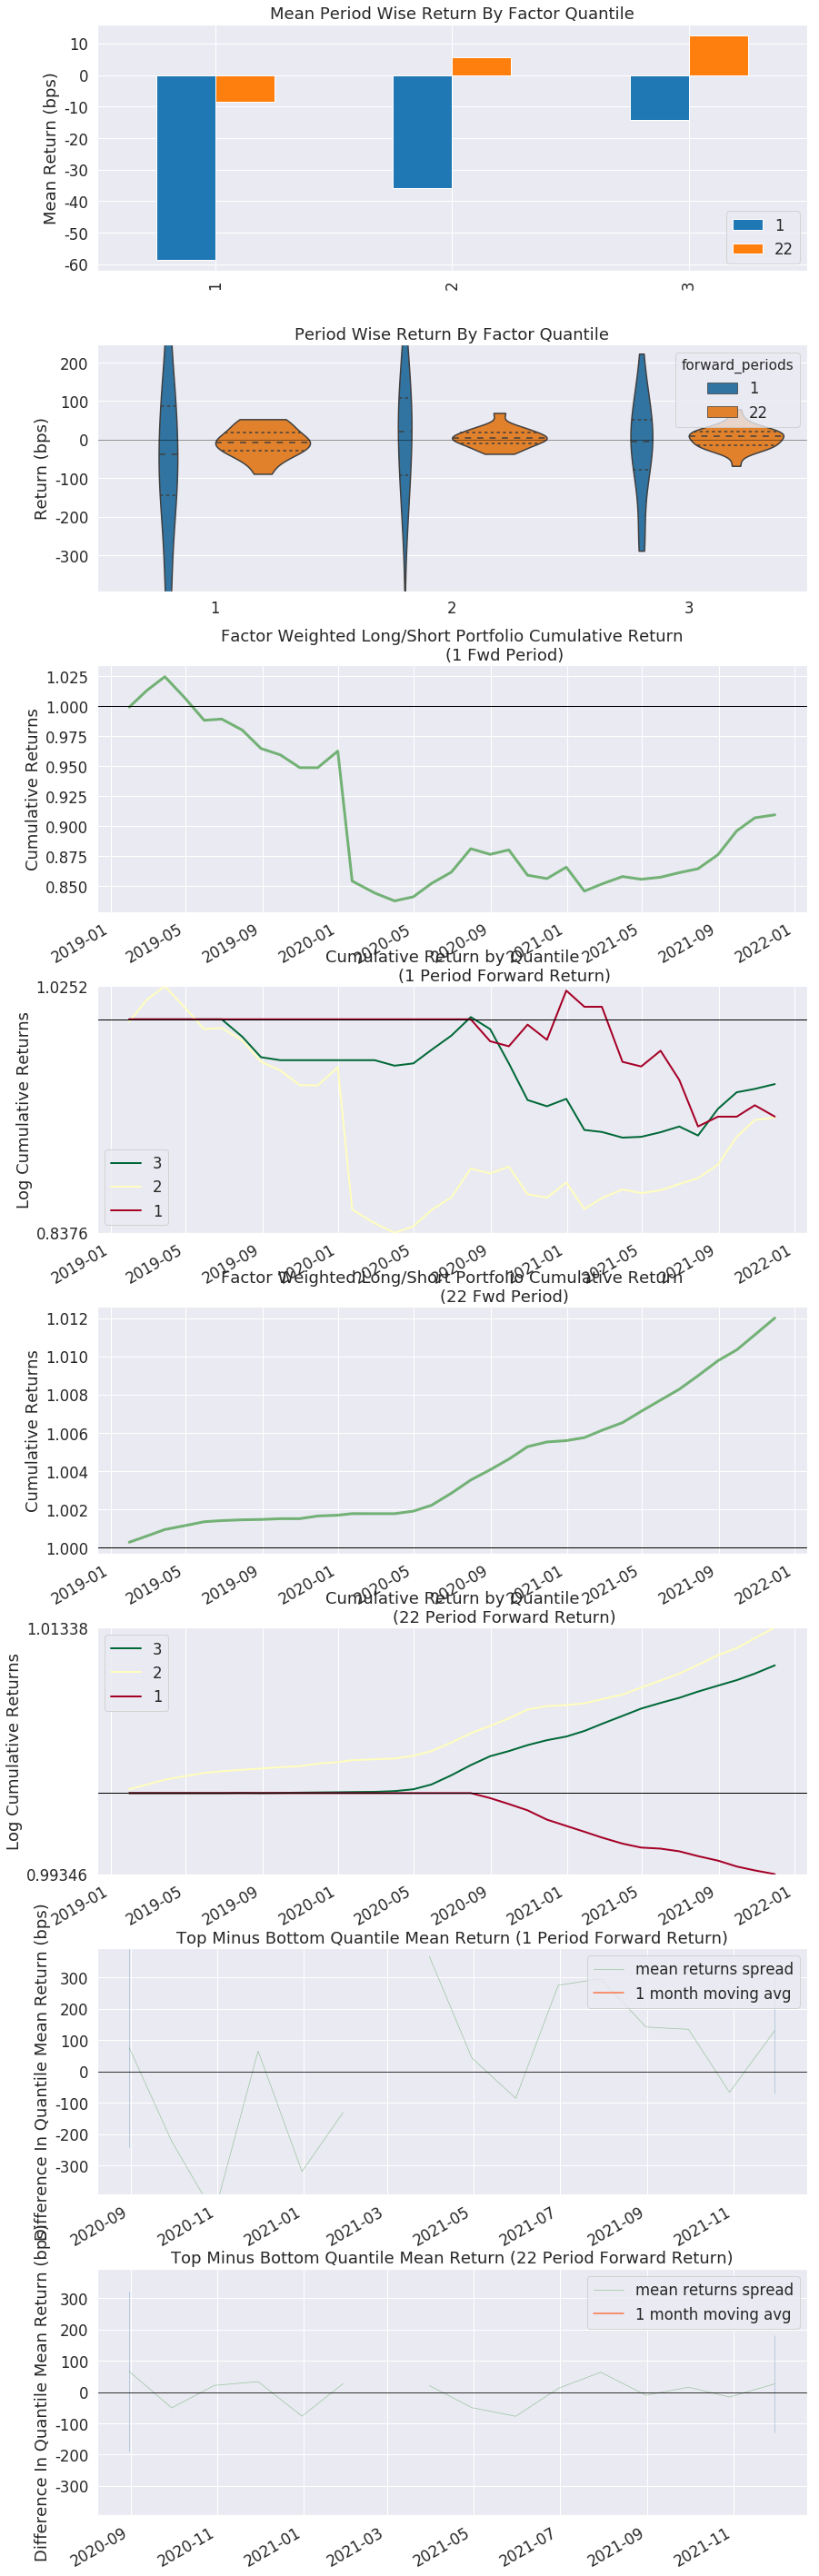

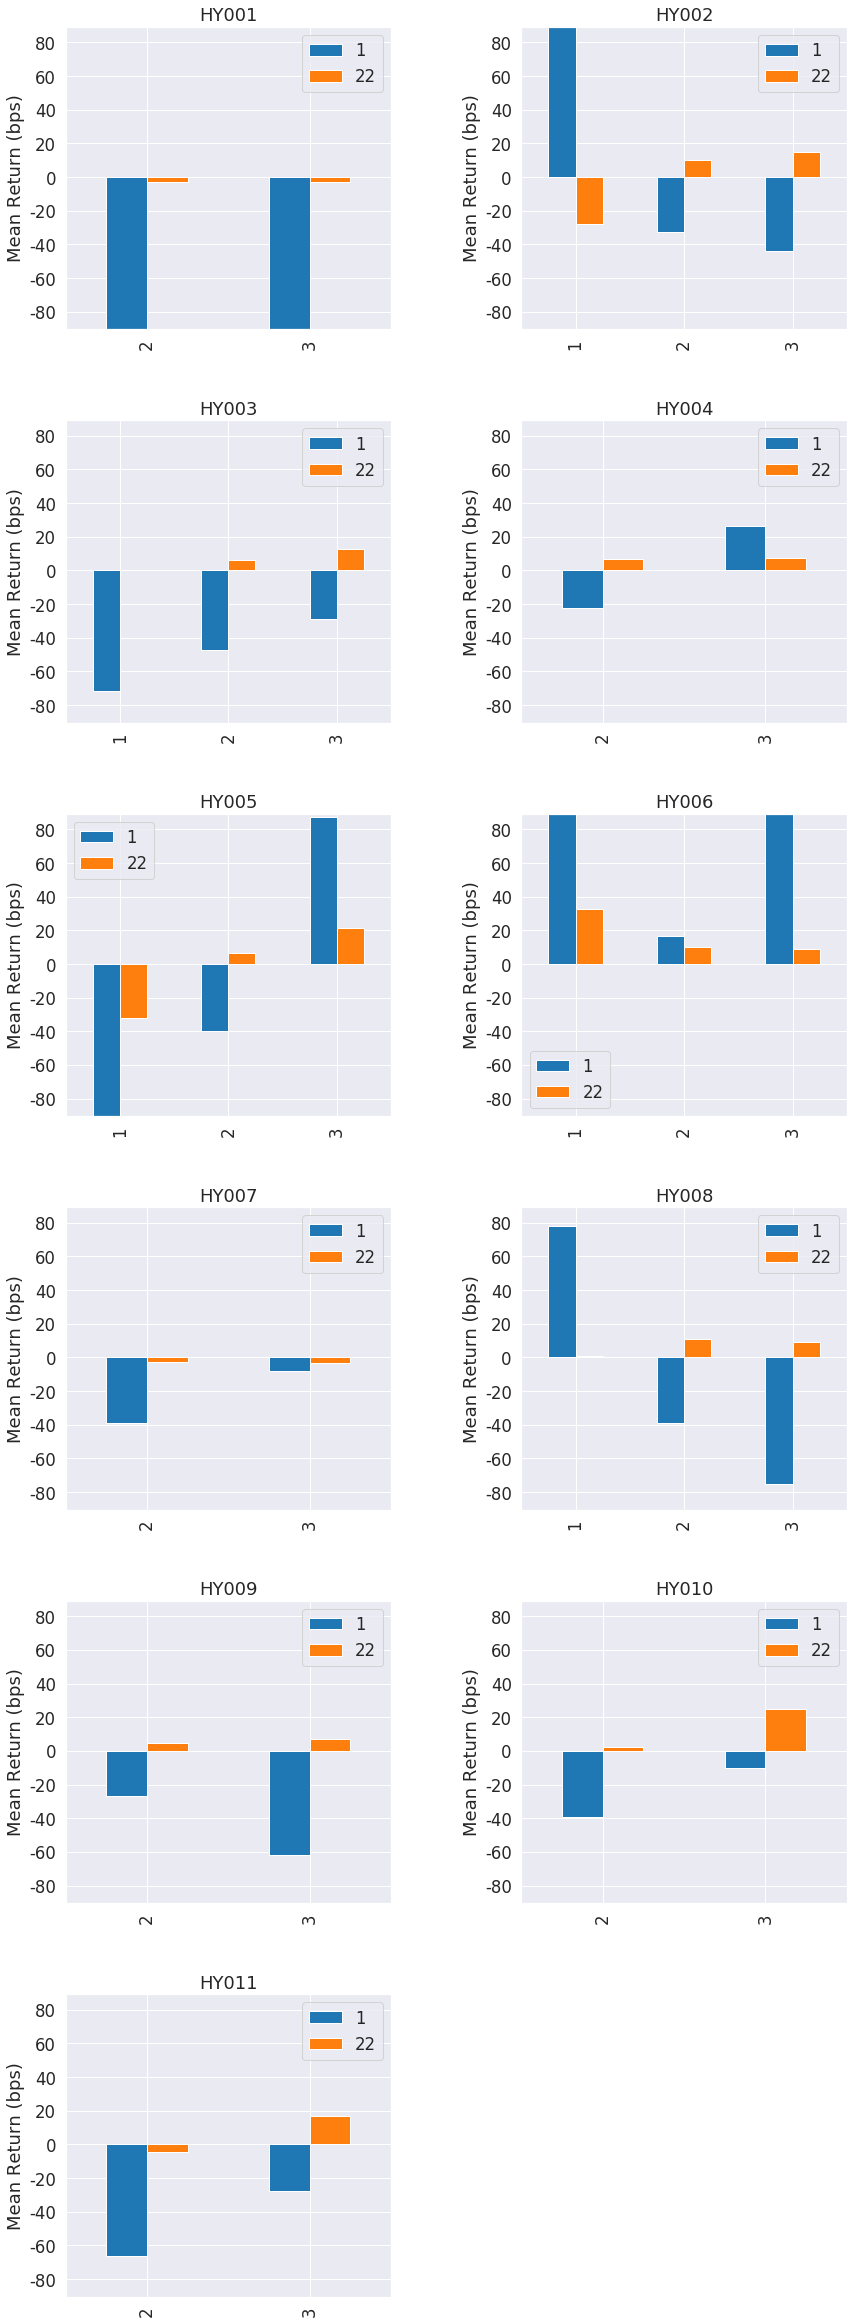

In [26]:
al.tears.create_returns_tear_sheet(cff_factor, long_short=False, group_neutral=False, by_group=True)

### 信息系数分析

Information Analysis


,1,22
IC Mean,0.016,-0.051
IC Std.,0.376,0.343
Risk-Adjusted IC,0.044,-0.149
t-stat(IC),0.258,-0.883
p-value(IC),0.798,0.384
IC Skew,0.419,-1.090
IC Kurtosis,3.149,3.160


<Figure size 432x288 with 0 Axes>

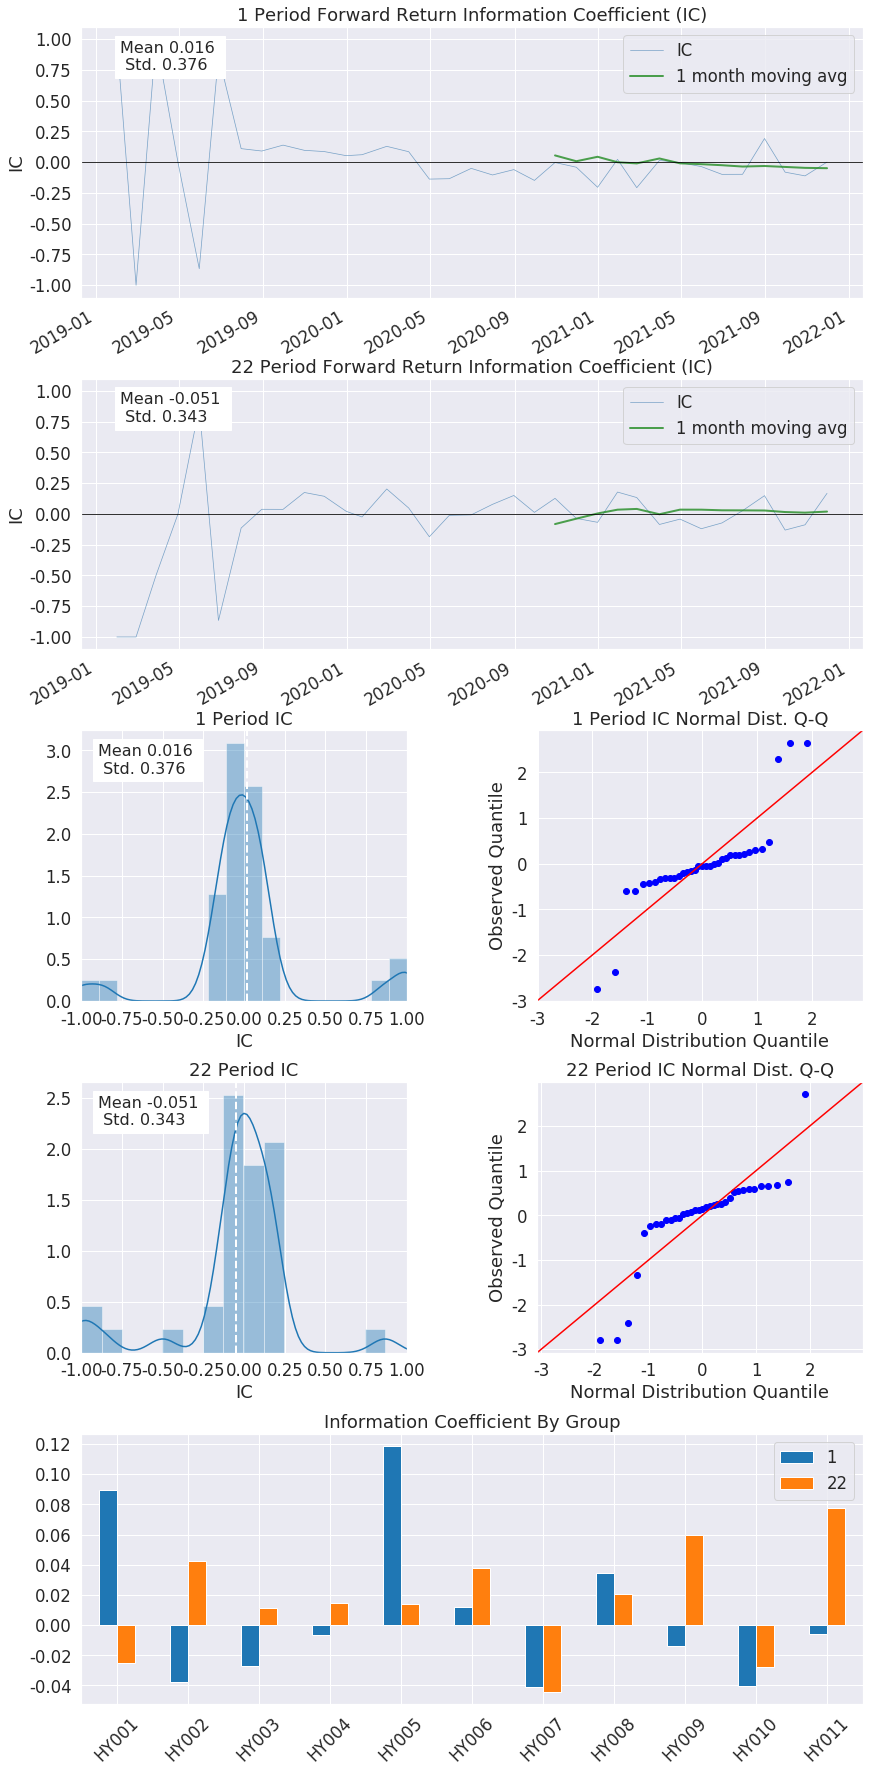

In [27]:
al.tears.create_information_tear_sheet(cff_factor, group_neutral=False, by_group=True)

### 换手率分析

Turnover Analysis


,1,22
Quantile 1 Mean Turnover,0.321,NaN
Quantile 2 Mean Turnover,0.098,0.588
Quantile 3 Mean Turnover,0.357,0.742


,1,22
Mean Factor Rank Autocorrelation,0.886,0.698


<Figure size 432x288 with 0 Axes>

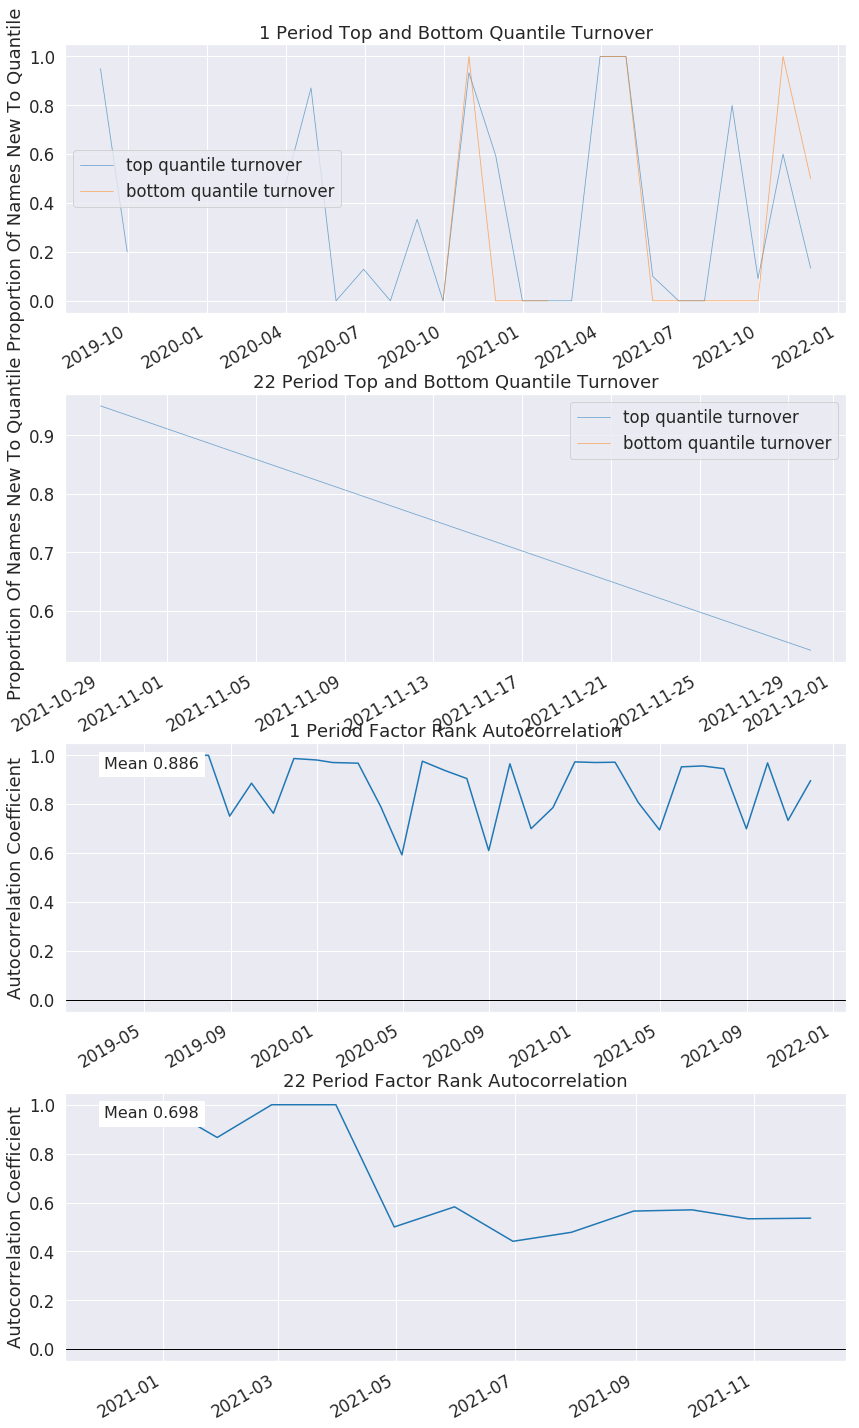

In [28]:
al.tears.create_turnover_tear_sheet(cff_factor)

### 绩效分析

In [41]:
ret = pd.pivot_table(cff_factor.reindex(), index='date', columns='factor_quantile', values=22)
ret.rename(columns={1.0: '低分组', 2.0:'中间组', 3.0: '高分组'}, inplace=True)
ret.fillna(method='ffill', inplace=True)
ret.fillna(0, inplace=True)
ret.head()

factor_quantile,低分组,中间组,高分组
date,,,
2019-01-31,0.0,0.163770,0.0
2019-02-28,0.0,0.025845,0.0
2019-03-29,0.0,0.015316,0.0
2019-04-30,0.0,-0.060607,0.0
2019-05-31,0.0,-0.005021,0.0


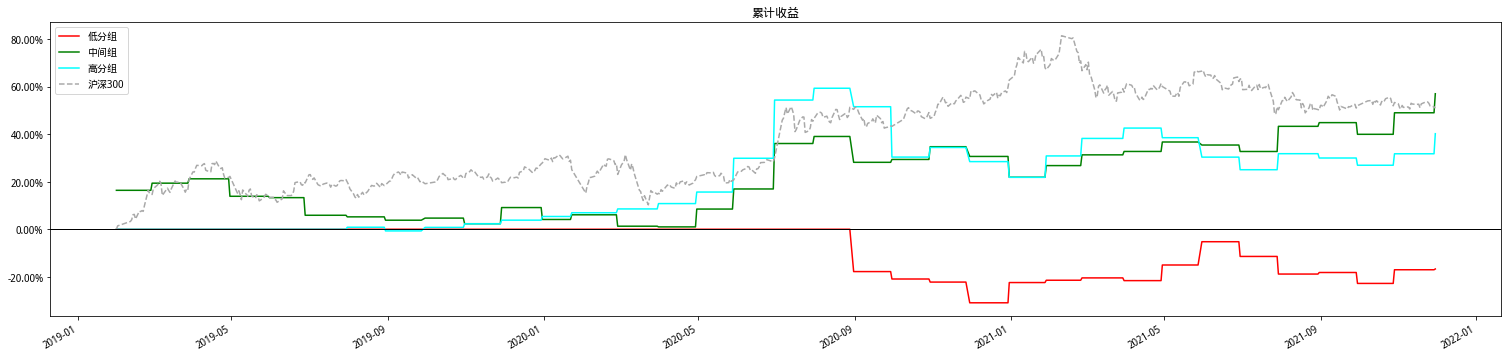

In [42]:
plot_cum_return(title='累计收益', ret=ret[['低分组', '中间组', '高分组']], benchmark_code=benchmark_code, benchmark_name='沪深300')

In [60]:
import empyrical as ep
return_df = ret#['低分组']
periods = 'monthly'
return_df.columns.tolist()

['低分组', '中间组', '高分组']

In [99]:
def strategy_performance(return_df,
                         periods='daily',
                         benchmark_code=None
                         ):
    import empyrical as ep   
    
    if benchmark is not None:
        benchmark_ret = get_price(benchmark_code, return_df.index[0], return_df.index[-1], fields='close')['close'].pct_change()
        benchmark_ret.fillna(0, inplace=True)
        return_df['benchmark'] = benchmark_ret

    col = return_df.columns.tolist()
    ser: pd.DataFrame = pd.DataFrame()
    for i in range(len(col)):
        sp = dict()
        sp['年化收益率'] = str(np.round(ep.annual_return(return_df.iloc[:, i], period=periods)*100, 2))+'%'
        sp['累计收益'] = str(np.round(ep.cum_returns(return_df.iloc[:, i]).iloc[-1]*100, 2))+'%'

        sp['夏普比'] = ep.sharpe_ratio(return_df.iloc[:, i], risk_free=0, period=periods, annualization=None)
        sp['索提诺'] = ep.sortino_ratio(return_df.iloc[:, i], required_return=0, period=periods, annualization=None, _downside_risk=None)
        sp['卡玛比率'] = ep.calmar_ratio(return_df.iloc[:, i], period=periods, annualization=None)
        sp['欧米加比率'] = ep.omega_ratio(return_df.iloc[:, i], risk_free=0.0, required_return=0.0, annualization=252)

        sp['波动率'] = ep.annual_volatility(return_df.iloc[:, i], period=periods)
        sp['最大回撤'] = ep.max_drawdown(return_df.iloc[:, i])
        ser = pd.concat([ser, pd.DataFrame(sp, index=[col[i]])])
        
    if not return_df['benchmark'] empty:
#         sp['IR'] = information_ratio(return_df.iloc[:, i], return_df['benchmark'])
        sp['Alpha'] = ep.alpha(return_df.iloc[:, i], return_df['benchmark'], period=periods)
        sp['超额收益'] = sp.apply(x: )
        sp['年化收益率'] - ser.loc[benchmark, '年化收益率']  # 计算相对年化波动率

        
    return ser#.T
strategy_performance(ret, 'monthly', benchmark_code=benchmark_code)#.style.format('{:.2%}')

,年化收益率,累计收益,夏普比,索提诺,卡玛比率,欧米加比率,波动率,最大回撤
低分组,-6.07%,-16.71%,-0.235426,-0.309234,-0.196350,0.769492,0.189368,-0.309389
中间组,16.73%,57.01%,0.884245,1.838293,1.002682,2.000703,0.196452,-0.166827
高分组,12.28%,40.2%,0.699549,1.249086,0.522085,1.839104,0.191232,-0.235254
benchmark,-2.11%,-6.03%,-0.440494,-0.573486,-0.197970,0.688417,0.046062,-0.106658
